In [12]:
import tensorflow as tf
import keras
from keras import layers

tf.random.set_seed(22)

In [13]:
import json
import numpy as np
import pandas as pd
from time import time
import random
import matplotlib.pyplot as plt
import os

In [24]:
name_model = "RWMDMAP-MP50-NB"
with open("../examples/rez.json", "r") as f:
    dataset = json.load(f)

In [25]:
print("Первый x:\n", dataset["train_x"][0])
print("Последний, x:\n", dataset["train_x"][-1])
print("Размер x:\t", len(dataset["train_x"][0]))
print("Первый y:\t", dataset["train_y"][0])
print("Последний y:\t", dataset["train_y"][0])
print("Кол-во записей:\t", len(dataset["train_x"]))

Первый x:
 [0.2845321585037409, 0.043478260869565216, 0.11420298157578246, 0.043478260869565216, 0.0, 0.999133073092352, 0.24745324428689172, 0.9990561583550596, 0.38349514563106796, 0.15384615384615383, 0.17814530949575066, 1.0, 0.1679702370431727, 0.17926546198337656, 0.3385182337697552, 1.0, 0.0, 0.9832820049844601, 0.3980582524271845, 0.6153846153846153, 0.1272466496398219, 0.3165265169252399, 0.5938644682536962, 1.0, 0.3385182337697552, 0.0, 0.0, 1.0, 1.0, 0.5384615384615384, 0.1272466496398219, 0.3165265169252399, 0.5938644682536962, 1.0, 0.3385182337697552, 0.0, 0.0, 1.0, 1.0, 0.5384615384615384, 0.17814530949575066, 1.0, 0.1679702370431727, 0.17926546198337656, 0.3385182337697552, 1.0, 0.0, 0.9832820049844601, 0.3980582524271845, 0.6153846153846153, 0.43263860877539445, 0.17926546198337656, 1.0, 0.5329945363729376, 0.3385182337697552, 0.9832820049844601, 0.0, 0.0, 0.004854368932038835, 1.0, 0.3983450219052373, 0.043478260869565216, 0.2773500981126146, 0.043478260869565216, 0.0,

In [26]:
train_x, train_y, val_x, val_y, test_x, test_y, = dataset["train_x"], dataset["train_y"], dataset["val_x"], dataset["val_y"], dataset["test_x"] , dataset["test_y"]

In [36]:
hist = []
model = keras.Sequential()

input_len = 500
output_len = 5

model.add(layers.Dense(units=input_len, activation='relu'))
model.add(layers.Flatten(input_shape=(5, )))
model.add(layers.Flatten(input_shape=(5, )))
# model.add(layers.Dense(units=256,  activation='relu'))

model.add(layers.Dense(units=100,  activation='relu'))
model.add(layers.Dropout(rate=0.25, seed=22))
model.add(layers.Dense(units=50,  activation='relu'))
model.add(layers.Dropout(rate=0.25, seed=22))
model.add(layers.Dense(units=25,  activation='relu'))
model.add(layers.Dropout(rate=0.25, seed=22))
model.add(layers.Dense(units=output_len, activation='softmax'))

In [37]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [42]:
batch_size = 50
epochs = 5
history = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_data=(val_x, val_y))
hist.append(history)

Epoch 1/5
83/83 [==============================] - 2s 24ms/step - loss: 1.0694 - accuracy: 0.5400 - val_loss: 1.1124 - val_accuracy: 0.5198
Epoch 2/5
83/83 [==============================] - 1s 7ms/step - loss: 1.0430 - accuracy: 0.5520 - val_loss: 1.1037 - val_accuracy: 0.5208
Epoch 3/5
83/83 [==============================] - 1s 8ms/step - loss: 1.0114 - accuracy: 0.5682 - val_loss: 1.1243 - val_accuracy: 0.5159
Epoch 4/5
83/83 [==============================] - 1s 7ms/step - loss: 0.9725 - accuracy: 0.5827 - val_loss: 1.1136 - val_accuracy: 0.5382
Epoch 5/5
83/83 [==============================] - 1s 6ms/step - loss: 0.9370 - accuracy: 0.5983 - val_loss: 1.1725 - val_accuracy: 0.5246


In [43]:
loss_and_metrics = model.evaluate(test_x, test_y, batch_size=batch_size)
loss_and_metrics

26/26 [==============================] - 0s 2ms/step - loss: 1.1384 - accuracy: 0.5143


[1.138372540473938, 0.5142857432365417]

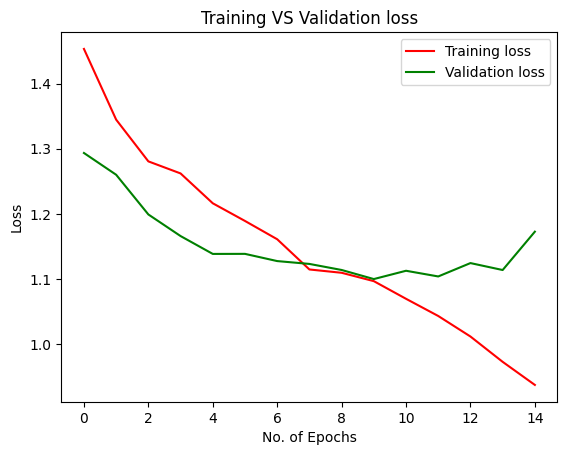

In [44]:
plt.plot(np.concatenate([h.history['loss'] for h in hist]), 'r', label='Training loss')
plt.plot(np.concatenate([h.history['val_loss'] for h in hist]), 'g', label='Validation loss')
plt.title('Training VS Validation loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

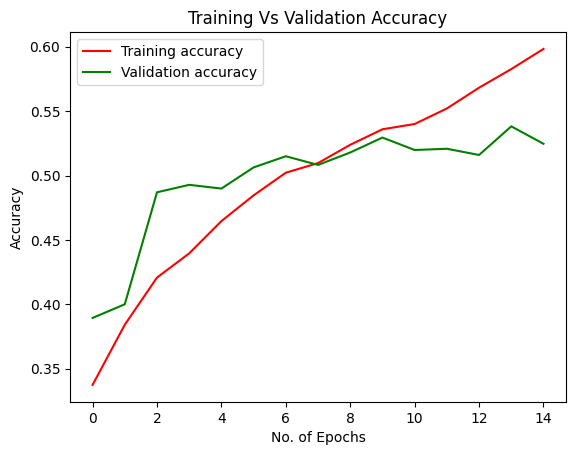

In [45]:
plt.plot(np.concatenate([h.history['accuracy'] for h in hist]), 'r', label='Training accuracy')
plt.plot(np.concatenate([h.history['val_accuracy'] for h in hist]), 'g', label='Validation accuracy')
plt.title('Training Vs Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [223]:
class ExportModule(tf.Module):
  def __init__(self, model, preprocess, class_pred):
    # Initialize pre and postprocessing functions
    self.model = model
    self.preprocess = preprocess
    self.class_pred = class_pred

  @tf.function(input_signature=[tf.TensorSpec(shape=[None, input_len], dtype=tf.float32)]) 
  def __call__(self, x):
    # Run the ExportModule for new data points
    x = self.preprocess(x)
    y = self.model(x)
    print(y)
    y = self.class_pred(y)
    return y

In [172]:
def preprocess_test(x):
  return x

def class_pred_test(y):
  # Generate class predictions from MLP output
  return y

In [173]:
mlp_model_export = ExportModule(model=model,
                                preprocess=preprocess_test,
                                class_pred=class_pred_test)

In [174]:
save_path = name_model
tf.saved_model.save(mlp_model_export, save_path)
mlp_loaded = tf.saved_model.load(save_path)

Tensor("sequential_15/dense_89/Softmax:0", shape=(None, 5), dtype=float32)
INFO:tensorflow:Assets written to: RWMDMA-MP50-NB/assets


INFO:tensorflow:Assets written to: RWMDMA-MP50-NB/assets


In [175]:
def accuracy_score(y_pred, y):
  # Generic accuracy function
  is_equal = tf.equal(y_pred, y)
  return tf.reduce_mean(tf.cast(is_equal, tf.float32))

test_classes = mlp_loaded(test_x)
test_acc = accuracy_score([np.argmax(y) for y in test_classes], [np.argmax(y) for y in test_y])
print(f"Test Accuracy: {test_acc:.3f}")

Test Accuracy: 0.543


In [176]:
mlp_loaded(test_x)

<tf.Tensor: shape=(980, 5), dtype=float32, numpy=
array([[1.4182316e-01, 2.3126879e-01, 1.7448731e-02, 3.2943612e-01,
        2.8002328e-01],
       [5.6660748e-01, 8.2528256e-03, 8.9880131e-04, 2.6245570e-02,
        3.9799526e-01],
       [2.7123106e-01, 3.8442924e-03, 4.3228581e-03, 7.1602361e-04,
        7.1988571e-01],
       ...,
       [9.4004792e-01, 1.1038423e-03, 6.1688149e-10, 2.2356475e-03,
        5.6612559e-02],
       [9.9879727e-03, 1.3220030e-01, 7.4812454e-01, 1.0814756e-01,
        1.5396533e-03],
       [6.9349304e-02, 2.0557930e-01, 5.0573552e-01, 1.8056561e-01,
        3.8770318e-02]], dtype=float32)>